# Consensus convergence : Quenched network

In [1]:
from FastConsensusSolver import QuenchedSolver
import matplotlib.pyplot as plt
import numpy as np

#define the system
network_dict = {0: [1,2,3,4], 1: [0,2,3,4], 2: [1,0,3,4], 3: [1,2,0,4], 4: [1,2,3,0]}
influence_dict = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5}
eta = 0.5
seed = 42

#define the solver with initial random state
cs = QuenchedSolver(network_dict, influence_dict, eta, seed)

#reach consensus
tol = 0.005
cs.reach_consensus(tol)

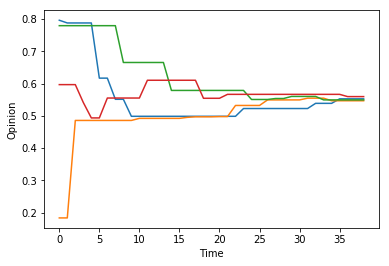

In [2]:
#get the raw data for temporal evolution of state
initial_state = cs.get_initial_state_vector()
history_vector = cs.get_history_vector()

#get the variation from the history and update state
node_vector = np.arange(0,4)
time_vector = np.arange(len(history_vector)+1)
temporal_state_dict = {node: [opinion] for node, opinion in zip(node_vector, initial_state)}
for t in time_vector[:-1]:
    for node, temporal_opinion_vector in temporal_state_dict.items():
        if history_vector[t][0] == node:
            temporal_opinion_vector.append(temporal_opinion_vector[-1]+history_vector[t][1])
        else:
            temporal_opinion_vector.append(temporal_opinion_vector[-1])

#draw the opinion of each node
for node in node_vector:
    plt.plot(time_vector, temporal_state_dict[node])
plt.xlabel(r"Time")
plt.ylabel(r"Opinion")
plt.show()

# Consensus convergence : Annealed network

In [3]:
from FastConsensusSolver import AnnealedSolver
import matplotlib.pyplot as plt
import numpy as np

#define the system
N = 1000
priority_dict = {i : 3 for i in range(N)}
for i in range(10):
    priority_dict[i] = 9000
influence_dict = {i: 0.1 for i in range(N)}
for i in range(10):
    influence_dict[i] = 0.9
eta = 0.5
seed = np.random.randint(0, 10**8)

#define the solver with initial random state
cs = AnnealedSolver(priority_dict, influence_dict, eta, seed)

#reach consensus
tol = 0.01
cs.reach_consensus(tol)
print(cs.get_time())

13006


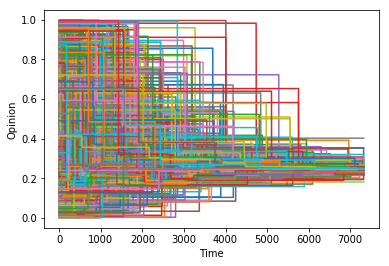

In [4]:
#get the raw data for temporal evolution of state
initial_state = cs.get_initial_state_vector()
history_vector = cs.get_history_vector()

#get the variation from the history and update state
node_vector = np.arange(0,N)
time_vector = np.arange(len(history_vector)+1)
temporal_state_dict = {node: [opinion] for node, opinion in zip(node_vector, initial_state)}
for t in time_vector[:-1]:
    for node, temporal_opinion_vector in temporal_state_dict.items():
        if history_vector[t][0] == node:
            temporal_opinion_vector.append(temporal_opinion_vector[-1]+history_vector[t][1])
        else:
            temporal_opinion_vector.append(temporal_opinion_vector[-1])

#draw the opinion of each node
for node in node_vector:
    plt.plot(time_vector, temporal_state_dict[node])
plt.xlabel(r"Time")
plt.ylabel(r"Opinion")
plt.show()